### First, in general, are Car Seats better than Seatbelts?

* *Null:* Car Seats are not better than seatbelts
* *Test:* Car Seats



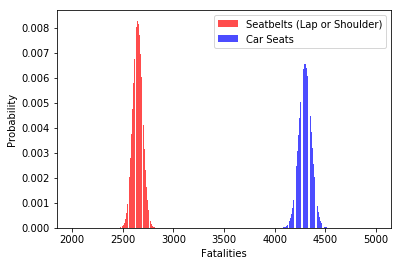

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

toddlers = pd.read_csv('Data/toddler.csv')
# Toddlers dying with Seatbelts on
 
toddlers.head()
# toddlers = toddlers[toddlers['Year']==2015]
toddlers['Seatbelt'] = 1*((toddlers['Lap Belt'] == 1) + (toddlers['Shoulder Belt'] == 1))
A = toddlers[toddlers['Seatbelt']>=1].copy()
num_a = A.shape[0]
fatalities_a = A[A['Fatal']==1].shape[0]

B = toddlers[toddlers['Car Seat']==1].copy()
num_b = B.shape[0]
fatalities_b = B[B['Fatal']==1].shape[0]

fatalities = np.arange(2000, 5000)
rate_a = fatalities_a/num_a
rate_b = fatalities_b/num_b
prob_a = binom(num_a, rate_a).pmf(fatalities)
prob_b = binom(num_b, rate_b).pmf(fatalities)

plt.bar(fatalities, prob_a, label="Seatbelts (Lap or Shoulder)", alpha=0.7)
plt.bar(fatalities, prob_b, label="Car Seats", alpha=0.7)
plt.legend()
plt.xlabel("Fatalities")
plt.ylabel("Probability")
plt.show()


Text(0, 0.5, 'Probability')

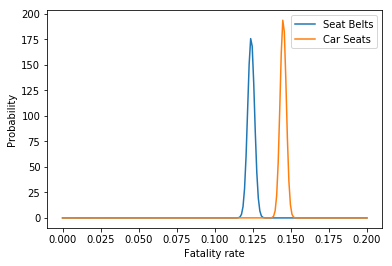

In [27]:


# Normal Distribution to find Averages

from scipy.stats import norm

# Where does this come from? See the link above.
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

death_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(death_rate)
prob_b = norm(rate_b, std_b).pdf(death_rate)

# Make the bar plots.
plt.plot(death_rate, prob_a, label="Seat Belts")
plt.plot(death_rate, prob_b, label="Car Seats")
plt.legend()
plt.xlabel("Fatality rate") 
plt.ylabel("Probability")

In [31]:
from scipy.stats import ttest_ind_from_stats

from scipy.stats import ttest_ind

zscore, prob = ttest_ind(A['Fatal'], B['Fatal'], equal_var=False)
print(f"Zscore is {zscore:0.2f}, p-value is {prob:0.5f} (two tailed), {prob/2:0.5f} (one tailed)")

Zscore is -6.93, p-value is 0.00000 (two tailed), 0.00000 (one tailed)


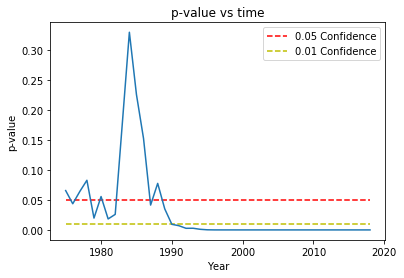

In [45]:
a = list(set(toddlers['Year']))
a.sort()
probs = []
years = []
sets = []
for year in a:
    df = toddlers[toddlers['Year']<=year]
    mean1 = np.mean(df[df['Seatbelt']==1]['Fatal'])
    std1 = np.std(df[df['Seatbelt']==1]['Fatal'])
    mean2 = np.mean(df[df['Car Seat']==1]['Fatal'])
    std2 = np.std(df[df['Car Seat']==1]['Fatal'])

    nobs1 = df[df['Seatbelt']==1].shape[0]
    nobs2 = df[df['Car Seat']==1].shape[0]

    zscore, prob = ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False)
    probs.append(prob/2)
    years.append(year)
               
               
plt.plot(years,probs)
plt.hlines(0.05,1975,2018,linestyle='--',color='r', label='0.05 Confidence')
plt.hlines(0.01,1975,2018,linestyle='--',color='y', label='0.01 Confidence')
plt.title('p-value vs time')
plt.xlabel('Year')
plt.ylabel('p-value')
plt.legend()
plt.show()